In [1]:
# package loading
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture

In [2]:
# for reproducible random results
np.random.seed(0) 

#Set Mean and Standard Deviation of the red and blue points
red_mean = 3
red_std = 0.8

blue_mean = 6
blue_std = 2

# Number of the points from each distribution
numberOfRedPoints = 400
numberOfBluePoints = 200

# Generate blue and red points using the mean and std
red = np.random.normal(red_mean, red_std, numberOfRedPoints)
blue = np.random.normal(blue_mean, blue_std, numberOfBluePoints)

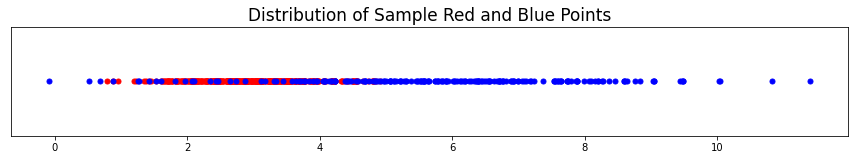

In [3]:
# Plot the red and blue points
plt.rcParams['figure.figsize'] = (15, 2)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10);
plt.plot(blue, np.zeros_like(blue), '.', color='b', markersize=10);
plt.title('Distribution of Sample Red and Blue Points', fontsize=17);
plt.yticks([]); # Doesn't show the y coordinates
plt.show()

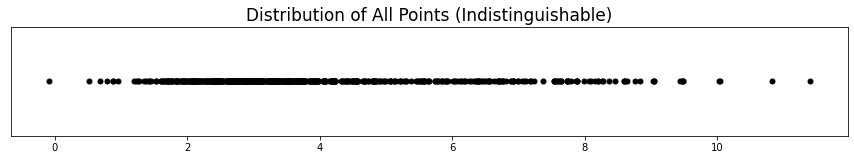

In [4]:
# Create an array for ALL points by adding every sample point (red & blue) and sort them
all_points = np.sort(np.concatenate((red, blue))) 

# Plot all points by making them indistinguishable (using the same color)
plt.plot(all_points, np.zeros_like(all_points), '.', color='k', markersize=10);
plt.title('Distribution of All Points (Indistinguishable)', fontsize=17);
plt.yticks([]); # Doesn't show the y coordinates
plt.show()

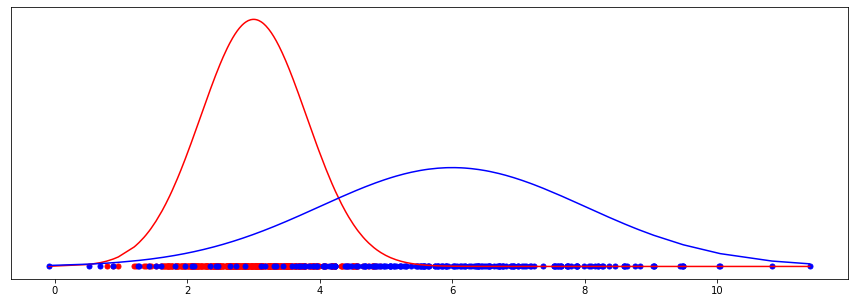

In [5]:
# Compute the likelihood of the red and blue distributions by computing respective PDF's
red_likelihood = stats.norm(red_mean, red_std).pdf(all_points)
blue_likelihood = stats.norm(blue_mean, blue_std).pdf(all_points)

# Plot the PDF of the two distributions
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10);
plt.plot(blue, np.zeros_like(blue), '.', color='b', markersize=10);
plt.plot(all_points, red_likelihood, color='r', alpha=1)
plt.plot(all_points, blue_likelihood, color='b', alpha=1)
plt.yticks([]);
plt.show()

## EM Algorithm

- EM parameters: prior probability (mixture variable), mean, std
- Expectation (Step 2 & 3)
- Maximization (Step 4, 5 & 6)

Step 1: Initialize the parameter values for each group's mean and standard deviation.

Step 2: Compute the likelihood of each data point appearing under the current parameter estimates. It represents the posterior probability distribution once we have observed the data points.

Step 3: Convert two likelihood values into weights for each data point belonging to two groups.

Step 4: Compute new estimates for the prior.

Step 5: Compute new estimates for mean.

Step 6: Compute new estimates for standard deviation.
Repeat step 2 to 6.

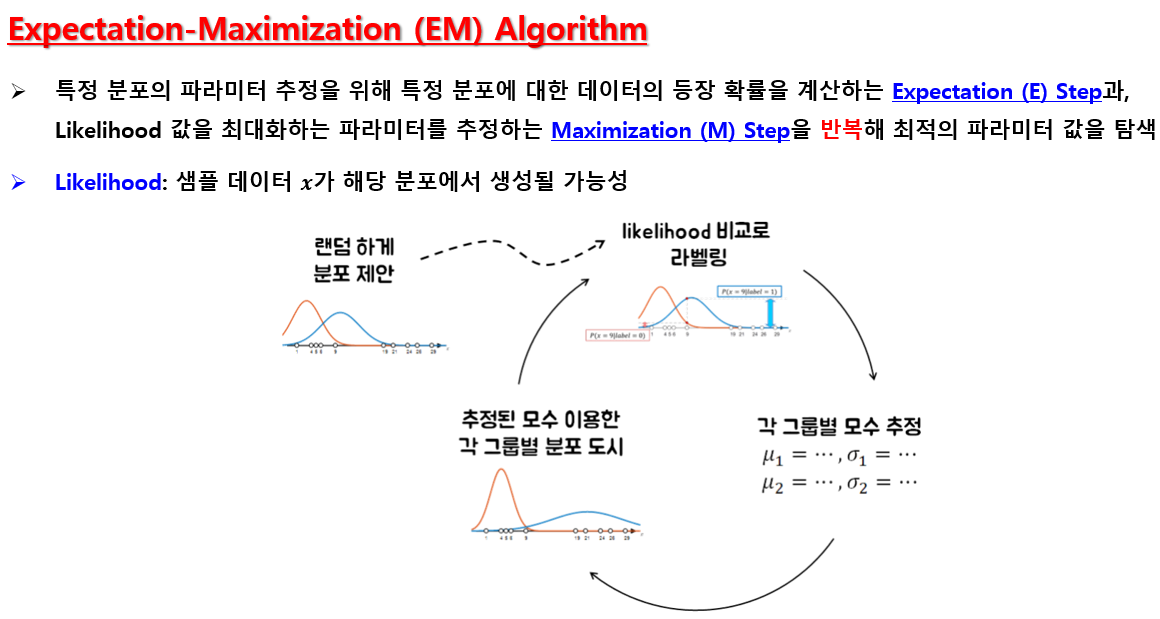

In [6]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)


def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

In [7]:
def plotFunction(x, red_mean_estimated, blue_mean_estimated, lineIntensity):
    plt.rcParams['figure.figsize'] = (15, 5)  
    plt.plot(x, stats.norm(red_mean_estimated, red_std_estimated).pdf(x), color='r', alpha=lineIntensity)
    plt.plot(x, stats.norm(blue_mean_estimated, blue_std_estimated).pdf(x), color='b', alpha=lineIntensity)
    #plt.legend(['red', 'blue'], loc='best')
    plt.title("Estimated Likelihood of the Red & Blue Distributions")
    plt.yticks([]); 

Iteration 0: log-likelihood is 5.013557
Iteration 1: log-likelihood is 5.178209
Iteration 2: log-likelihood is 5.288427
Iteration 3: log-likelihood is 5.362208
Iteration 4: log-likelihood is 5.416948
Iteration 5: log-likelihood is 5.460157
Iteration 6: log-likelihood is 5.493963
Iteration 7: log-likelihood is 5.518940
Iteration 8: log-likelihood is 5.535759
Iteration 9: log-likelihood is 5.545534
Iteration 10: log-likelihood is 5.549600
Iteration 11: log-likelihood is 5.549198
Iteration 12: log-likelihood is 5.545305
Iteration 13: log-likelihood is 5.538692
Iteration 14: log-likelihood is 5.530056
Iteration 15: log-likelihood is 5.520081
Iteration 16: log-likelihood is 5.509404
Iteration 17: log-likelihood is 5.498557
Iteration 18: log-likelihood is 5.487935
Iteration 19: log-likelihood is 5.477798
Iteration 20: log-likelihood is 5.468299
Iteration 21: log-likelihood is 5.459506
Iteration 22: log-likelihood is 5.451435
Iteration 23: log-likelihood is 5.444065
Iteration 24: log-likeliho

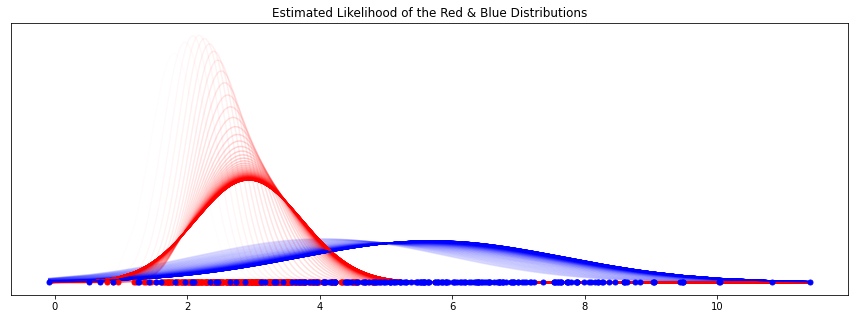

In [10]:
# The EM Algorithm

# Step 1: Initialize the parameter values for each group's mean and standard deviation. 

# Initialize the mean
red_mean_estimated = 1.1
blue_mean_estimated = 20.1

# Initialize the standard deviation
red_std_estimated = 0.2
blue_std_estimated = 5.2

# Initialize the prior probability (mixture variable)
red_prior = 0.5
blue_prior = 0.5
   


iteration = 0
while(True):    
    
    # Expectation (Step 2 & 3)
    
    # Step 2:
    # Compute the likelihood of each data point appearing under the current parameter estimates.
    # It represents the posterior probability distribution once we have observed the data points. 
    

    # Compute the likelihood for both groups using the current estimates of the mean and standard deviation
    red_likelihood = stats.norm(red_mean_estimated, red_std_estimated).pdf(all_points)
    blue_likelihood = stats.norm(blue_mean_estimated, blue_std_estimated).pdf(all_points)

    # Compute total likelihood based on the current estimates of the parameters
    total_likelihood_current = np.sum(red_likelihood + blue_likelihood)
    
    # Compute total log-likelihood based on the current estimates of the parameters
    total_log_likelihood_current = np.log(total_likelihood_current)
    
    # Compute the evidence for using in the weight computation
    evidence = (red_likelihood * red_prior) + (blue_likelihood * blue_prior)

    # Step 3: Convert two likelihood values into weights for each data point belonging to two groups
    red_weight = (red_likelihood * red_prior) / evidence
    blue_weight = (blue_likelihood * blue_prior) / evidence
    
    #__________________________________________________________________________________________________
    
    # Maximization (Step 4, 5 & 6)
    
    # Step 4: Compute new estimates for the prior
    red_prior = np.sum(red_weight)/len(all_points)
    blue_prior = np.sum(blue_weight)/len(all_points)
    
    
    # Step 5: Compute new estimates for mean
    red_mean_estimated = estimate_mean(all_points, red_weight)
    blue_mean_estimated = estimate_mean(all_points, blue_weight)
    
    
    # Step 6: Compute new estimates for standard deviation 
    blue_std_estimated = estimate_std(all_points, blue_weight, blue_mean_estimated)
    red_std_estimated = estimate_std(all_points, red_weight, red_mean_estimated)
    
    
    # Compute the likelihood of each data point appearing under the updated parameter estimates.
    red_likelihood = stats.norm(red_mean_estimated, red_std_estimated).pdf(all_points)
    blue_likelihood = stats.norm(blue_mean_estimated, blue_std_estimated).pdf(all_points)

    total_likelihood_updated = np.sum(red_likelihood + blue_likelihood)
    
    total_log_likelihood_updated = np.log(total_likelihood_updated)
    
    print('Iteration %d: log-likelihood is %.6f'%(iteration, total_log_likelihood_updated))
    
    
    # Stopping criterion: stop iteration if the difference between the log-likelihood between two iterations
    #                     is less than 1e-4
    if(abs(total_log_likelihood_updated - total_log_likelihood_current) < 1e-4):
        print('\nTerminate at %d-th iteration: log-likelihood is %.6f'%(iteration, total_log_likelihood_current))
        break
  
    
    plotFunction(all_points, red_mean_estimated, blue_mean_estimated, iteration*0.01)
 
    iteration += 1

# Plot the original red and blue points
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10);
plt.plot(blue, np.zeros_like(blue), '.', color='b', markersize=10);

In [11]:
# comparisons of estimated parameters
print("Mean (Original) of red points = %f"% np.mean(red))
print("Mean (Estimated) of red points = %f"% red_mean_estimated)


print("\nStandard Deviation (Original) of red points = %f"% np.std(red))
print("Standard Deviation (Estimated) of red points = %f"% red_std_estimated)


print("\nMean (Original) of blue points = %f"% np.mean(blue))
print("Mean (Estimated) of blue points = %f"% blue_mean_estimated)


print("\nStandard Deviation (Original) of blue points = %f"% np.std(blue))
print("Standard Deviation (Estimated) of blue points = %f"% blue_std_estimated)


print("\nBlue Prior: ", blue_prior)
print("Red Prior: ", red_prior)

Mean (Original) of red points = 2.977158
Mean (Estimated) of red points = 2.927013

Standard Deviation (Original) of red points = 0.790509
Standard Deviation (Estimated) of red points = 0.805724

Mean (Original) of blue points = 5.784505
Mean (Estimated) of blue points = 5.691657

Standard Deviation (Original) of blue points = 2.063051
Standard Deviation (Estimated) of blue points = 1.992177

Blue Prior:  0.3566201731252783
Red Prior:  0.6433798268747217


# GMM training

In [12]:
X = all_points
X = X.reshape(len(all_points), 1)

# model train
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=42)

In [13]:
# GMM parameters
print("Weights: ", gm.weights_)

print("\nMeans:\n", gm.means_)

print("\nCovariances:\n", gm.covariances_)

Weights:  [0.75062567 0.24937433]

Means:
 [[3.02736958]
 [6.5785409 ]]

Covariances:
 [[[0.82454069]]

 [[2.43492454]]]
